# **Installing Required Libraries** 

In [ ]:
!pip install pytube noisereduce gradio pytube moviepy SpeechRecognition gentle nltk transformers pydub noisereduce gradio librosa matplotlib

# **Downloading Video and Extracting Audio** 

In [2]:
from download import *

url = "https://www.youtube.com/watch?v=sHWsE1WnfyA"
audio_file = download_and_extract_audio(url)
if audio_file:
    print(f"Audio file saved at: {audio_file}")
else:
    print("Failed to download and extract audio.")

Video downloaded successfully.
Extracting audio...
MoviePy - Writing audio in audio.wav


MoviePy - Done.
Audio extracted successfully.
Audio file saved at: audio.wav


# **Audio Preprocessing**

In [3]:
from audioPreprocessing import *

input_audio_path = audio_file

# Reduce noise
noise_reduced_audio = reduce_noise(input_audio_path)
if noise_reduced_audio:
    print(f"Noise-reduced audio file saved at: {noise_reduced_audio}")
else:
    print("Failed to reduce noise in audio.")

# Resample audio
resampled_audio = resample_audio(noise_reduced_audio)
if resampled_audio:
    print(f"Resampled audio file saved at: {resampled_audio}")
else:
    print("Failed to resample audio.")

Noise-reduced audio file saved at: reduced_noise.wav
Resampled audio file saved at: resampled_audio.wav


# **Generating Transcription using Wisper**

In [4]:
from Wisper import *

resampled_audio = "resampled_audio.wav"
# Retrieve transcriptions without timestamps
transcriptions = transcribe_audio_with_whisper(resampled_audio, return_timestamps=True)
print("Transcriptions:", transcriptions)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Transcriptions: [{'timestamp': (0.0, 3.0), 'text': ' Shall I start off by wishing you a happy birthday in advance?'}, {'timestamp': (3.0, 4.0), 'text': ' Yes, sure.'}, {'timestamp': (4.0, 8.0), 'text': ' So we can, two weeks in advance, we can only offer you words.'}, {'timestamp': (8.0, 12.0), 'text': ' Do you think the people of Pembroke are going to offer you more than words?'}, {'timestamp': (12.0, 19.0), 'text': ' Yes, all elections are, you have to wait till the counting, you know, what people decide.'}, {'timestamp': (19.0, 23.0), 'text': ' But having said it, I always believe in an extremely warm heart.'}, {'timestamp': (23.0, 25.2), 'text': ' During course of a campaign you'}, {'timestamp': (25.2, 30.16), 'text': ' actually pick up a certain vibration and that is unmistakable. Actually normally many a'}, {'timestamp': (30.16, 34.24), 'text': ' time you know the word it is like previously said that the vibrations in the body like'}, {'timestamp': (34.24, 38.96), 'text': ' a hot

# **Formatting output**

In [6]:
data = transcriptions

sample_output_list = []
chunk_id = 1
for i in range(len(data)):
    start_time = data[i]['timestamp'][0]
    end_time = data[i]['timestamp'][1]
    chunk_length = round(end_time - start_time, 2)
    text = data[i]['text']
    sample_output_list.append({
        "chunk_id": chunk_id,
        "chunk_length": chunk_length,
        "text": text,
        "start_time": start_time,
        "end_time": end_time,
    })
    chunk_id += 1

print(sample_output_list)

[{'chunk_id': 1, 'chunk_length': 3.0, 'text': ' Shall I start off by wishing you a happy birthday in advance?', 'start_time': 0.0, 'end_time': 3.0}, {'chunk_id': 2, 'chunk_length': 1.0, 'text': ' Yes, sure.', 'start_time': 3.0, 'end_time': 4.0}, {'chunk_id': 3, 'chunk_length': 4.0, 'text': ' So we can, two weeks in advance, we can only offer you words.', 'start_time': 4.0, 'end_time': 8.0}, {'chunk_id': 4, 'chunk_length': 4.0, 'text': ' Do you think the people of Pembroke are going to offer you more than words?', 'start_time': 8.0, 'end_time': 12.0}, {'chunk_id': 5, 'chunk_length': 7.0, 'text': ' Yes, all elections are, you have to wait till the counting, you know, what people decide.', 'start_time': 12.0, 'end_time': 19.0}, {'chunk_id': 6, 'chunk_length': 4.0, 'text': ' But having said it, I always believe in an extremely warm heart.', 'start_time': 19.0, 'end_time': 23.0}, {'chunk_id': 7, 'chunk_length': 2.1999999999999993, 'text': ' During course of a campaign you', 'start_time': 23

# **Saving the Output**

In [8]:
import json

# Specify the filename
output_filename = 'chunks.json'

# Save the list of dictionaries to a JSON file
with open(output_filename, 'w') as json_file:
    json.dump(sample_output_list, json_file, indent=4)

# **Some Graphs**

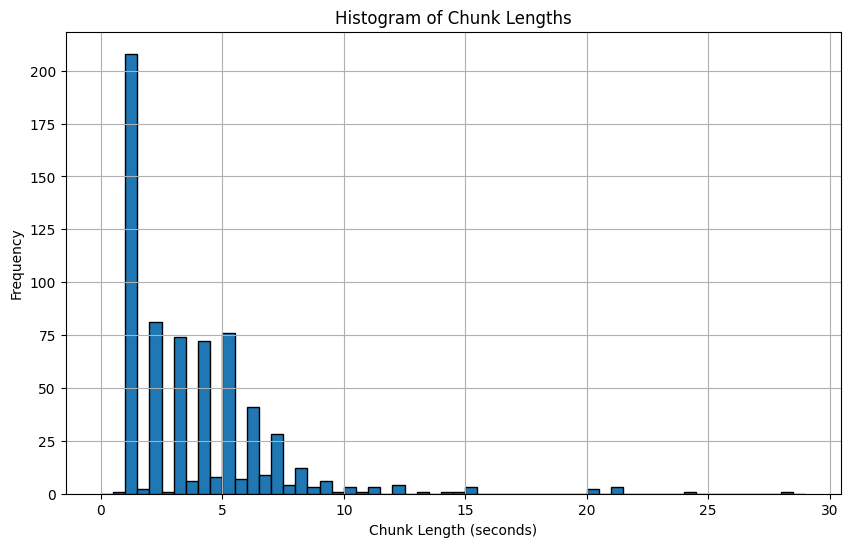

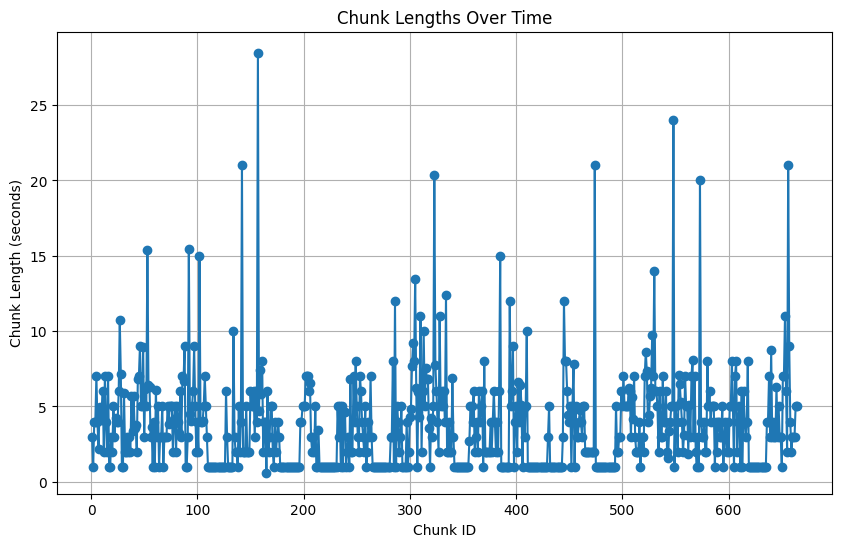

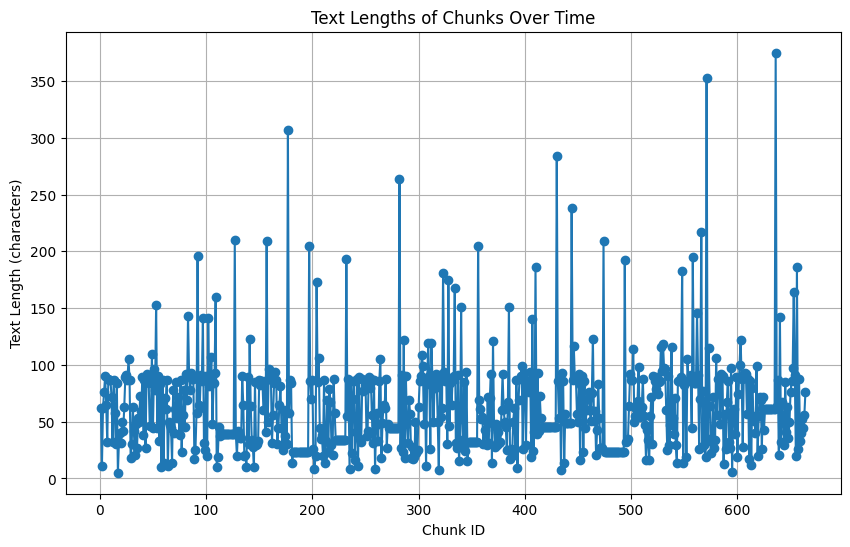

In [7]:
import matplotlib.pyplot as plt
import numpy as np


# Extract data for plotting
chunk_ids = [chunk['chunk_id'] for chunk in sample_output_list]
chunk_lengths = [chunk['chunk_length'] for chunk in sample_output_list]
start_times = [chunk['start_time'] for chunk in sample_output_list]
end_times = [chunk['end_time'] for chunk in sample_output_list]
text_lengths = [len(chunk['text']) for chunk in sample_output_list]

# Histogram of Chunk Lengths
plt.figure(figsize=(10, 6))
plt.hist(chunk_lengths, bins=np.arange(0, max(chunk_lengths) + 1, 0.5), edgecolor='black')
plt.title('Histogram of Chunk Lengths')
plt.xlabel('Chunk Length (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Chunk Lengths Over Time
plt.figure(figsize=(10, 6))
plt.plot(chunk_ids, chunk_lengths, marker='o')
plt.title('Chunk Lengths Over Time')
plt.xlabel('Chunk ID')
plt.ylabel('Chunk Length (seconds)')
plt.grid(True)
plt.show()

# Text Lengths of Chunks
plt.figure(figsize=(10, 6))
plt.plot(chunk_ids, text_lengths, marker='o')
plt.title('Text Lengths of Chunks Over Time')
plt.xlabel('Chunk ID')
plt.ylabel('Text Length (characters)')
plt.grid(True)
plt.show()
